In [119]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [120]:
####
#read in data
####
#col = ["1","2","3","4","5","6","7","8","9"]
col = ["1","2","3","4","5","6"]
X = pd.read_csv("./data/train_data6.csv",sep=",",names = col)
Y = pd.read_csv("./data/label_data6.csv",sep=",",names = ["label"])

In [121]:

#####################
# Set parameters
#####################
# Data params
noise_var = 0
num_datapoints = len(X)
test_size = 0.2
num_train = int((1-test_size) * num_datapoints)
num_train = num_train-num_train%100
norm_method = 2   #normalization method

# Network params
input_size = 6   #length of input vector x
batch_block_size = 100
# If `per_element` is True, then LSTM reads in one timestep at a time.
per_element = True
op_method = 1   #optimizer method:1 for Adam and 2 for RMSprop
if per_element:
    lstm_input_size = 1
else:
    lstm_input_size = input_size
    
# size of hidden layers
h1 = 32    #hiddle dimension
output_dim = 1
num_layers = 2
learning_rate = 1e-2     #learning rate
num_epochs = 1000     # training interation times

In [122]:
#################
#normalization
################
if norm_method == 1:
    #method1
    X_max = X.max(axis=1)
    for i in range(0,len(X)-1):
        X.loc[i,:] = X.loc[i,:]/X_max.loc[i]
        Y.loc[i] = Y.loc[i]/X_max.loc[i]
elif norm_method == 2:
    #method2
    X = X/50
    Y = Y/50
elif norm_method == 3:
    #method3
    XY = pd.concat([X,Y], axis = 1)
    XY_n = normalize(XY, norm="max", axis=1)
    XY_n = pd.DataFrame(data=XY_n[0:,0:])
    X = XY_n.loc[:,0:len(XY.columns)-2]
    Y = XY_n.loc[:,len(XY.columns)-1:len(XY.columns)-1]

In [123]:
X

,1,2,3,4,5,6
0,0.50,0.70,0.62,0.44,0.50,0.88
1,0.44,0.50,0.88,0.72,0.64,0.48
2,0.72,0.64,0.48,0.94,0.82,1.20
3,0.94,0.82,1.20,1.22,0.96,0.82
4,1.22,0.96,0.82,0.78,1.18,1.14
5,0.78,1.18,1.14,1.12,1.28,1.42
6,1.12,1.28,1.42,1.10,1.34,1.10
7,1.10,1.34,1.10,1.00,1.36,1.24
8,1.00,1.36,1.24,1.00,1.38,1.10
9,1.00,1.38,1.10,1.40,1.18,1.32


In [124]:
#####################
# Generate data
#####################

# make training and test sets in torch
X_train = X.loc[0:num_train-1,:]
y_train = Y.loc[0:num_train-1,:]
# X_test = X.loc[num_train:,:]
# y_test = Y.loc[num_train:,:]
X_test = X.loc[num_datapoints-num_train:num_datapoints-1,:]
y_test = Y.loc[num_datapoints-num_train:num_datapoints-1,:]

X_train = torch.tensor(X_train.values,dtype=torch.float)
X_test = torch.tensor(X_test.values,dtype=torch.float)
y_train = torch.tensor(y_train.values,dtype=torch.float).view(-1)
y_test = torch.tensor(y_test.values,dtype=torch.float).view(-1)


X_train = X_train.view([input_size, -1, 1])
X_test = X_test.view([input_size, -1, 1])


In [125]:
print(y_test.size(),X_test.size())

(torch.Size([2000]), torch.Size([6, 2000, 1]))


In [126]:
#####################
# Build model
#####################

# Here we define our model as a class
class LSTM(nn.Module):

    def __init__(self, input_dim, hidden_dim, batch_size, output_dim=1,
                    num_layers=2):
        super(LSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers)

        # Define the output layer
        self.linear = nn.Linear(self.hidden_dim, output_dim)

    def init_hidden(self):
        # This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))

    def forward(self, input):
        # Forward pass through LSTM layer
        # shape of lstm_out: [input_size, batch_size, hidden_dim]
        # shape of self.hidden: (a, b), where a and b both 
        # have shape (num_layers, batch_size, hidden_dim).
        lstm_out, self.hidden = self.lstm(input.view(len(input), self.batch_size, -1))
        # Only take the output from the final timetep
        # Can pass on the entirety of lstm_out to the next layer if it is a seq2seq prediction
        y_pred = self.linear(lstm_out[-1].view(self.batch_size, -1))
        return y_pred.view(-1)

model = LSTM(lstm_input_size, h1, batch_size=num_train, output_dim=output_dim, num_layers=num_layers)

loss_fn = torch.nn.MSELoss(size_average=False)
#loss_fn = torch.nn.SmoothL1Loss(size_average=False)

if op_method == 1:
    optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate)
else:
    optimiser = torch.optim.RMSprop(model.parameters(), lr=learning_rate, alpha=0.9)


In [127]:

#####################
# Train model
#####################

hist = np.zeros(num_epochs)

model.hidden = model.init_hidden()
for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
    # Forward pass
    y_pred = model(X_train)

    loss = loss_fn(y_pred, y_train)
    if t % 100 == 0:
        print("Epoch ", t, "MSE: ", loss.item())
        print("mean: ", y_pred.mean())
        print(y_pred)
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()

('Epoch ', 0, 'MSE: ', 2451.132080078125)
('mean: ', tensor(0.0358, grad_fn=<MeanBackward0>))
tensor([0.0359, 0.0348, 0.0365,  ..., 0.0360, 0.0387, 0.0378],
       grad_fn=<ViewBackward>)
('Epoch ', 100, 'MSE: ', 135.75112915039062)
('mean: ', tensor(1.1106, grad_fn=<MeanBackward0>))
tensor([1.1068, 1.1010, 1.1113,  ..., 1.1123, 1.1236, 1.1222],
       grad_fn=<ViewBackward>)
('Epoch ', 200, 'MSE: ', 122.82926177978516)
('mean: ', tensor(1.1068, grad_fn=<MeanBackward0>))
tensor([1.0236, 0.9844, 1.0679,  ..., 1.1175, 1.1662, 1.1979],
       grad_fn=<ViewBackward>)
('Epoch ', 300, 'MSE: ', 122.072021484375)
('mean: ', tensor(1.1113, grad_fn=<MeanBackward0>))
tensor([1.0295, 0.9844, 1.0746,  ..., 1.1223, 1.1863, 1.2220],
       grad_fn=<ViewBackward>)
('Epoch ', 400, 'MSE: ', 121.36842346191406)
('mean: ', tensor(1.1113, grad_fn=<MeanBackward0>))
tensor([1.0293, 0.9842, 1.0750,  ..., 1.1161, 1.1832, 1.2242],
       grad_fn=<ViewBackward>)
('Epoch ', 500, 'MSE: ', 120.97610473632812)
('mea

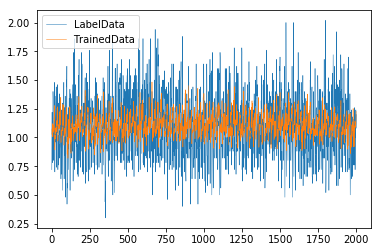

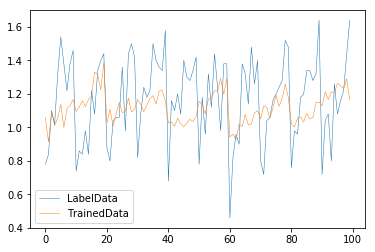

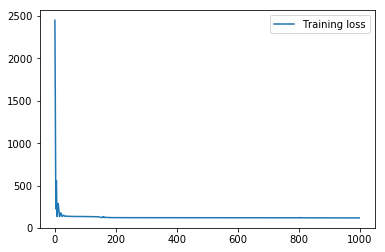

('loss_MSE:', 119.5185775756836)


In [128]:
#####################
# training data: Plot preds and performance
#####################

plt.plot(y_train.detach().numpy(), label="LabelData",linewidth=0.5)
plt.plot(y_pred.detach().numpy(), label="TrainedData",linewidth=0.5)
plt.legend()
plt.show()

start = 700
plt.plot(y_train.detach().numpy()[start:start+100], label="LabelData",linewidth=0.5)
plt.plot(y_pred.detach().numpy()[start:start+100], label="TrainedData",linewidth=0.5)
plt.legend()
plt.show()

plt.plot(hist, label="Training loss")
plt.legend()
plt.show()

loss_MSE_train = loss_fn(y_pred, y_train).item()
print("loss_MSE:", loss_MSE_train)

In [129]:
##########
#test model
#########
print(X_test.size())

y_test_pred = model(X_test)
loss_MSE = loss_fn(y_test_pred, y_test).item()


torch.Size([6, 2000, 1])


('loss_MSE:', 126.83513641357422)


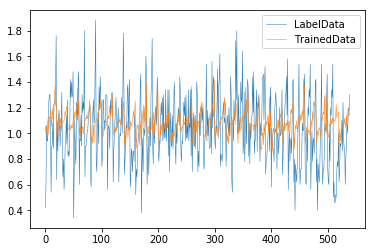

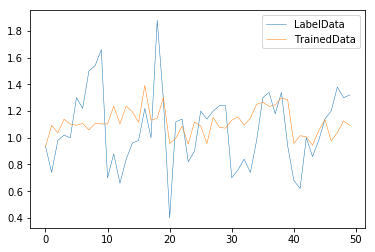

In [130]:
#####################
# test data: Plot preds and performance
#####################
print("loss_MSE:", loss_MSE)

plt.plot(y_test.detach().numpy()[1460:2000], label="LabelData",linewidth=0.5)
plt.plot(y_test_pred.detach().numpy()[1460:2000], label="TrainedData",linewidth=0.5)
plt.legend()
plt.show()

end = 350
plt.plot(y_test.detach().numpy()[end-50:end], label="LabelData",linewidth=0.5)
plt.plot(y_test_pred.detach().numpy()[end-50:end], label="TrainedData",linewidth=0.5)
plt.legend()
plt.show()



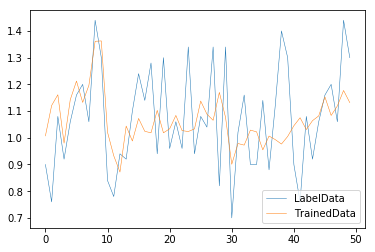

In [143]:
end = 1700
plt.plot(y_test.detach().numpy()[end-50:end], label="LabelData",linewidth=0.5)
plt.plot(y_test_pred.detach().numpy()[end-50:end], label="TrainedData",linewidth=0.5)
plt.legend()
plt.show()

74.09619903564453